In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Dataset Preparation

X, Y = make_blobs(n_samples = 500, centers = 5, random_state = 3)

In [3]:
X.shape, Y.shape

((500, 2), (500,))

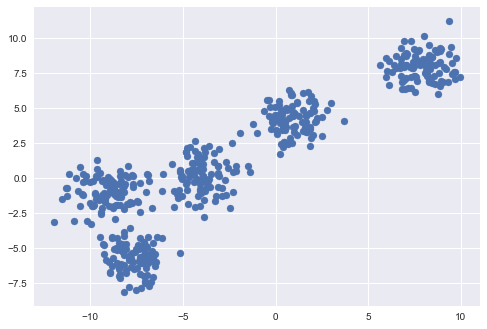

In [4]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
# Distance b/w 2 points

def EculedianDistance(p1, p2):
    return np.sqrt( np.sum( p1 - p2) **2 )

In [6]:
# Generate Random Points 
# hint : If it is in the range of (-10, 10), it would be great

k = 5
colors = ["red", "green", "yellow", "blue", "black"]
clusters = {}

for i in range(k):
    center = 10 * (2 * np.random.random((X.shape[1], )) -1)
    points = []
    
    cluster = {
        
        'center' : center,    # Coordinate of Cluster
        'points' : points,    # List of coordinates of point belongs to this cluster
        'color'  : colors[i]  # Color assigned to the cluster
        
    }
    clusters[i] = cluster
    

In [7]:
# A raw cluster dictionary

clusters

{0: {'center': array([-5.9166634, -7.916073 ]), 'points': [], 'color': 'red'},
 1: {'center': array([-6.2188632 ,  8.64918308]),
  'points': [],
  'color': 'green'},
 2: {'center': array([-8.98236878, -8.94395674]),
  'points': [],
  'color': 'yellow'},
 3: {'center': array([-0.07579428, -9.92148698]),
  'points': [],
  'color': 'blue'},
 4: {'center': array([6.44499516, 4.93485205]),
  'points': [],
  'color': 'black'}}

# E Step

In [8]:
def assignPointstoClusters(clusters):
    
    for ix in range(X.shape[0]): # Iterate over all the dataset 

        distance = []
        current_x = X[ix]

        for kx in range(k): # Now consider each cluster point for a particular data point

            dist = EculedianDistance(clusters[kx]["center"], current_x) # Distance btw cluster "kx" and data point "current_x"
            distance.append(dist)

        cluster_found = np.argmin(distance) # Minimum distance will be considered 
        
        clusters[cluster_found]["points"].append(current_x) # Assign this point to the cluster which is least far away

# M Step 

In [9]:
def updateCluster(clusters):
    
    for kx in range(k): # Iterate over each cluster
         
        points = np.array(clusters[kx]["points"]) # Datapoints extraction
        
        if points.shape[0] != 0: # Number of Points assigned to the cluster should not be 0
            
            mean = np.mean(points, axis = 0)
            
            # RESET 
            clusters[kx]["center"] = mean
            clusters[kx]["points"] = []
            

# Data Visualization

In [10]:
def DataVisualization(clusters):
    
    for kx in range(k):
        
        points = np.array(clusters[kx]["points"])
        
        try :
            plt.scatter(points[:, 0], points[:, 1], color = clusters[kx]["color"], alpha = 0.5, label = "cluster "+str(kx))
            plt.legend()
        
        except:
            pass
        
        plt.scatter(clusters[kx]["center"][0], clusters[kx]["center"][1], color = clusters[kx]["color"], marker = "+")

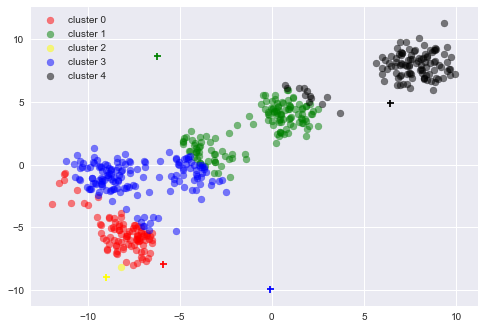

In [11]:
assignPointstoClusters(clusters)
DataVisualization(clusters)
updateCluster(clusters)

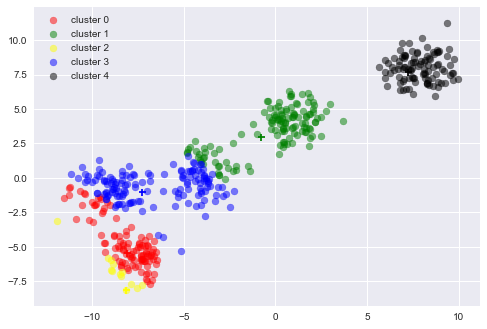

In [12]:
assignPointstoClusters(clusters)
DataVisualization(clusters)
updateCluster(clusters)